# Assignment Questions:

### 1) Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
####      a) How do you choose your bin size?

### 2) Create a box and whisker plot for availability_365. What does this show you?

### 3) What is the probability that the price for an Airbnb is under 50 dollars.
####      a) What do you notice about these records? Hint: look at the other columns.
####      b) What distribution does this data most closely fit?

### 4) Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
####      a) Why sample variance and not population variance?
####      b) What is your takeaway for each metric?
####      c) What are the scales of measurement for each of these values? 

### 5) What percent of Airbnb listings in Belize are available 360 days a year or more?
####     a) 360 days or less?
####     b) What distribution does this data most closely fit?

### 6) What minimum night count are 75% of Airnbnb listing in Belize greater than?

### 1) Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import seaborn as sns
from scipy import stats

#reading the csv file and displaying first 10 results as a reference for myself
belize_df = pd.read_csv('belize_airbnb_listings.csv')
belize_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
6,124794,Sabal Beach - secluded eco-retreat,562206,David & Wayne,Toledo,Toledo Mainland,16.28752,-88.54550,Entire home/apt,232,3,18,1/12/2020,0.16,2,338
7,152512,"Stunning one br apt-kitchen, air con, bikes & ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52644,-88.37000,Entire home/apt,165,7,64,2/10/2021,0.57,5,298
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362


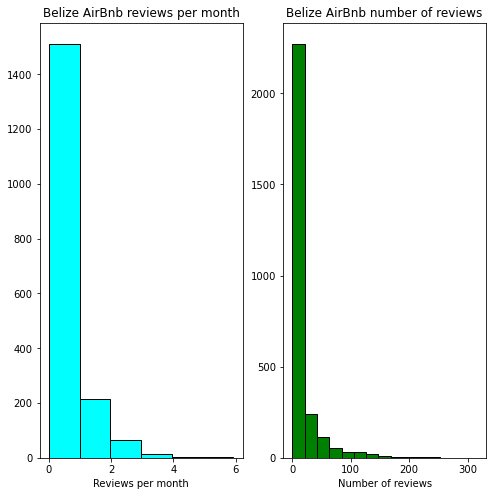

In [2]:
#loading seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


#First, making sure I can get the plots to work and seeing what they look like with default bins
#This creates the first (left subplot)--this is for reviews per month
#plt.subplot(1, 2, 1) 
#Making a histogram of the number of reviews per month
#plt.hist(data = belize_df, x = 'reviews_per_month')

#This creates the second (right)subplot--this is for number of reviews
#plt.subplot(1, 2, 2) 
#Making a histogram of number of reviews
#plt.hist(data = belize_df, x = 'number_of_reviews')

# Setting up the figure and setting the size of the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

# Inputting information for the first histogram plot
ax1.hist(data=belize_df, x='reviews_per_month', bins=6, color = 'cyan', edgecolor = 'black')

# Setting the title and axes labels for my first subplot
ax1.set(title = "Belize AirBnb reviews per month",
       xlabel = "Reviews per month")

# Inputting information for the second histogram plot (2nd subplot)
ax2.hist(data=belize_df, x='number_of_reviews',bins=15, color = 'green', edgecolor = 'black')

# Setting the title and axes labels for the second subplot
ax2.set(title = "Belize AirBnb number of reviews",
       xlabel = "Number of reviews")

plt.show()

#This gives me a starting point but it is clear that we aren't seeing many details here and bin sizes should be reduced.

(array([2.238e+03, 2.530e+02, 1.220e+02, 5.700e+01, 3.200e+01, 3.500e+01,
        2.000e+01, 1.300e+01, 1.000e+01, 6.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320]),
 <BarContainer object of 16 artists>)

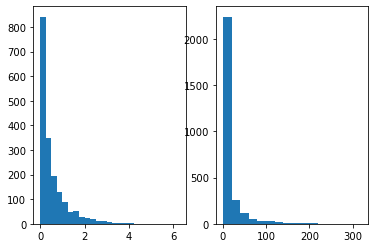

In [3]:
#I would like to extract more details out of the data so I'm trying a new bin size for each subplot-I just wanted 
#demonstrate to myself that my previous bin sizes were appropriate.

bin_size_monthly = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25]
bin_size_total = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]


plt.subplot(1, 2, 1) 
#Making a histogram of the number of reviews per month
plt.hist(data = belize_df, x = 'reviews_per_month', bins = bin_size_monthly)

#This creates the second (right)subplot--this is for number of reviews
plt.subplot(1, 2, 2) 
#Making a histogram of number of reviews
plt.hist(data = belize_df, x = 'number_of_reviews', bins = bin_size_total)

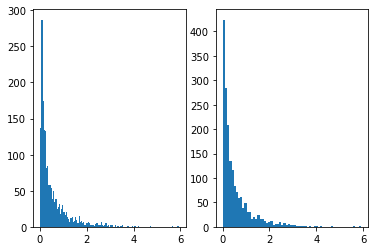

In [4]:
plt.subplot(1, 2, 1) 
w = 0.05
n = math.ceil((belize_df['reviews_per_month'].max() - belize_df['reviews_per_month'].min())/w)
ax = plt.hist(belize_df['reviews_per_month'], bins = n)

plt.subplot(1, 2, 2) 
x = 5
a = math.ceil((belize_df['number_of_reviews'].max() - belize_df['number_of_reviews'].min())/x)
ax = plt.hist(belize_df['reviews_per_month'], bins = a)

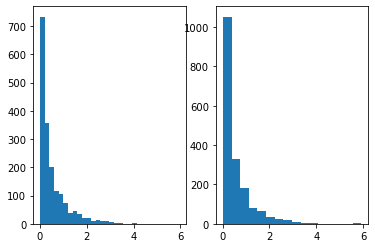

In [5]:
plt.subplot(1, 2, 1) 
w = 0.2
n = math.ceil((belize_df['reviews_per_month'].max() - belize_df['reviews_per_month'].min())/w)
ax = plt.hist(belize_df['reviews_per_month'], bins = n)

plt.subplot(1, 2, 2) 
x = 20
a = math.ceil((belize_df['number_of_reviews'].max() - belize_df['number_of_reviews'].min())/x)
ax = plt.hist(belize_df['reviews_per_month'], bins = a)

### 1a) How do you choose your bin size?

##### Picking a bin size depends on a munber of different parameters. In the end, it is typically a judgment call, although there do exist a number of formulas (such as Rice's formula) that can be helpful when determining how many bins should be used. If you use too few bins, you don't accurately capture the shape of the data. If you choose too many, the histogram can show too much (unneeded) detail and the signal can become lost in the potential noise introduced by including so many bins. Larger datasets generally call for higher number of bins but not always (consider a test where you may not wish to break scores down further even if there are many students).

##### For my 1st set of plots (I do think these are the appropriate bin sizes), I set the bins to represent 1 review for the reviews per month plot and 20 reviews for the total reviews plot. To me, it made sense to not divide the bins down further. For the total number of reviews, I chose vins of 20 because it gave a reasonable amount information/detail without cluttering the plot. 


### 2) Create a box and whisker plot for availability_365. What does this show you?

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64

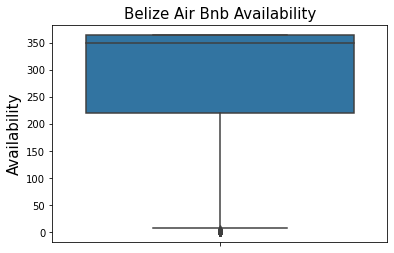

In [6]:
##Boxplot

sns.boxplot(y='availability_365', data=belize_df)

#Labeling and adjusting the boxplot
plt.ylabel("Availability", size=15)
plt.title("Belize Air Bnb Availability", size=15)

belize_df['availability_365'].describe()

##### This shows that the vast majority of the Air Bnb availability is between about 220-365 days per year (with the median being around 350 days of availability). Many rentals are available for more than 350 days (data is significantly skewed towards high availability). There are some units with very low availability but those are the exception, not the rule.

### 3) What is the probability that the price for an Airbnb is under 50 dollars.

0.292755088508575
0.017525035765379112
skew for price is 9.115141627062858
SkewtestResult(statistic=55.07345199570821, pvalue=0.0)
(246.20133064594887, 22.138469719886952, 655.1312124420939)
0.03392234277730671


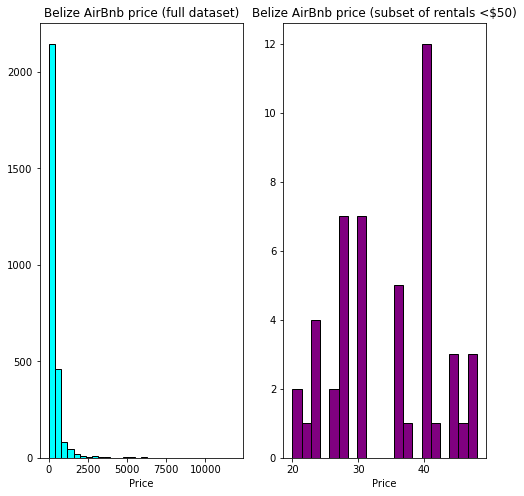

In [34]:
from scipy.stats import norm
prob_less_50=norm.cdf(50,belize_df['price'].mean(), statistics.stdev(belize_df['price']))
print(prob_less_50)

#I suspect I cannot actually do this because the distribution is not normal (it is skew normal). A fellow student
# suggested that the TAs told her to actually calculate the probability given the data. 
#Here is that attempt:

#making 2 new data frames-1 for values of price less than $50 and the other for values of price greater than or 
#equal to $50
price_under50_df= belize_df[belize_df["price"] <50]
price_over50_df=belize_df[belize_df["price"] >= 50]


#To calculate the probability, we need to consider the number of possibilities that satisfy our condition (<$50)
# and divide that by the total number of possibilities ( P(<$50) = len(price_under50_df["price"])/len(belize_df["price"])
prob_u50=(len(price_under50_df['price']))/(len(belize_df['price']))
print(prob_u50)

#Based off of in class discussion, I find that I have done this problem incorrectly. 
#I'm revisiting this problem using a skew normal distribution and the built in functions in scipy and numpy.


  
from scipy.stats import skewnorm
from scipy.stats import skew
from scipy.stats import skewtest

skew_price=skew(belize_df['price'])
print('skew for price is', skew_price)
print(skewtest(belize_df['price']))
print(skewnorm.fit(belize_df['price']))

#Taking the values from the fit of skewnorm
prob_less_50_skew=skewnorm.cdf(50, 246.20133064594887, 22.138469719886952, 655.1312124420939)
print(prob_less_50_skew)

#print(len(price_under50_df['price']))
#print(len(belize_df['price']))


#plt.subplot(1, 2, 1) 
#plt.hist(data = belize_df, x = 'price', bins = 50)
#plt.xlim([0, 5500])

#plt.subplot(1, 2, 2) 
#plt.hist(data = price_under50_df, x = 'price', bins = 10)



# Setting up the figure and setting the size of the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

# Inputting information for the first histogram plot
ax1.hist(data=belize_df, x='price', bins=30, color = 'cyan', edgecolor = 'black')

# Setting the title and axes labels for my first subplot
ax1.set(title = "Belize AirBnb price (full dataset)",
       xlabel = "Price")

# Inputting information for the second histogram plot (2nd subplot)
ax2.hist(data=price_under50_df, x='price',bins=20, color = 'purple', edgecolor = 'black')

# Setting the title and axes labels for the second subplot
ax2.set(title = "Belize AirBnb price (subset of rentals <$50)",
       xlabel = "Price")

plt.show()

#### 3a) What do you notice about these records? Hint: look at the other columns.

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']
49


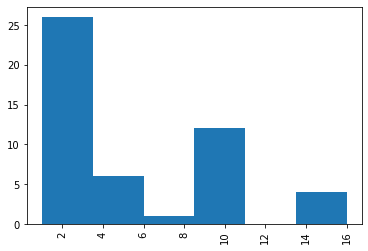

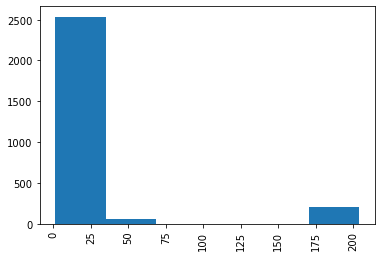

In [15]:
# Making plots with other data to identify possible relationships

#First, considering room type
#sns.scatterplot(x='room_type', y='price', data=price_under50_df)
uniqueValues_rt = belize_df['room_type'].unique()
print(uniqueValues_rt)
print(len(price_under50_df['room_type']))
#Based on this information, we can tell that there are no hotel rooms for rentals under $50.
#We can also conclude that at this price point, it appears most rentals are private rooms for this price range.


#Next, looking at minimum night requirements
#plt.hist(x='minimum_nights', data=price_under50_df, bins=30)
#plt.show()

#sns.scatterplot(x='minimum_nights', y='price', data=price_under50_df)


#Considering neighborhoods
#plt.hist(x='neighbourhood', data=price_under50_df, bins=30)
#plt.xticks(rotation = 90)
#plt.show()

#plt.hist(x='neighbourhood', data=belize_df, bins=30)
#plt.xticks(rotation = 90)
#plt.show()

#considering availability
#plt.hist(x='availability_365', data=price_under50_df, bins=30)
#plt.xticks(rotation = 90)
#plt.show()

#plt.hist(x='availability_365', data=belize_df, bins=30)
#plt.xticks(rotation = 90)
#plt.show()

#considering reviews per month
#plt.hist(x='reviews_per_month', data=price_under50_df, bins=6)
#plt.xticks(rotation = 90)
#plt.show()

#plt.hist(x='reviews_per_month', data=belize_df, bins=6)
#plt.xticks(rotation = 90)
#plt.show()

#considering total reviews 
#plt.hist(x='number_of_reviews', data=price_under50_df, bins=6)
#plt.xticks(rotation = 90)
#plt.show()

#plt.hist(x='number_of_reviews', data=belize_df, bins=6)
#plt.xticks(rotation = 90)
#plt.show()

#considering reviews per month
plt.hist(x='calculated_host_listings_count', data=price_under50_df, bins=6)
plt.xticks(rotation = 90)
plt.show()

plt.hist(x='calculated_host_listings_count', data=belize_df, bins=6)
plt.xticks(rotation = 90)
plt.show()

##### We can examine other information to see what, if anything the rentals under 50 dollars have in common. I started by looking at the room type. The majority of the rentals in this category are for private rooms and it is notable that there are NO hotel rooms included in the subset of the data. 

##### I also plotted the distribution of minimum nights for this subset of data. The vast majority of rentals are available for a minimum night stay<5 nights, but a few rentals require minimum stays of 7 nights and an even smaller number of rentals have a minimum stay of 25+ nights. Overall, we can determine that this data represents primarily rentals with very short minimum stays. 

##### In terms of neighborhoods, we can consider the representation of different neighborhoods in the subset compared to the full dataset. In order from most to least represented by the subset of data with a price under 50 dollars we have: Cayo, Belize Mainland, Stann Creek Mainland, Belize Islands, Toledo Mainland, and Orange Walk neighborhoods. When we compare this to the overall dataset, we see very different representation. In the overall data, the order of most to least represented neighborhoods is as follows: Belize Islands, Stann Creek Mainland, Cayo, Belize Mainland, Corozal (not represented in our subset data), Toledo Mainland, Orange Walk, and finall Stann Creek Islands (also not represented in our subset data).

##### We can further explore this data by looking at the availability data. Overall, the distribution of the availability data for the rentals under 50 dollars compared to all rentals is pretty similar. Most availability is for around 350+ nights, but there are some peaks at lower values too.

##### The number of reviews per month is pretty similar for both datasets.

##### The total number of reviews are similar for both datasets in terms of shape of the distribution. However, it is notable for the subset of data on rentals under 50 dollars, there are no rentals with a total amount of reviews over 120 reviews whereas for the whole dataset, the total number of reviews maxes at at around 300 reviews.

##### The calculated host listings count is notably significantly less for the under 50 dollars subset of the data compared to the entire dataset.

#### 3b) What distribution does this data most closely fit?

<AxesSubplot:>

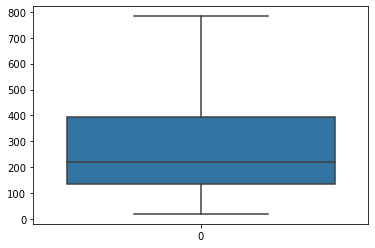

In [17]:
sns.boxplot(data=belize_df['price'], showfliers=False)

#sns.boxplot(data=belize_df['price'])

###### This distribution is highly skewed. Most values fall between just under 150 dollars to around 400 dollars. There are some outliers with prices in the thousands of dollars. These outliers significantly skew the data. 

### 4) Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [143]:
#Using the aggregate function to calculate sample variance and standard deviation for the numerical columns. 
#I did not include host id because it is simply a number/label and doesn't really have numberical sense beyond that.

all_stats=belize_df[['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].agg(["std", "var"])

all_stats

#belize_df['number_of_reviews'].describe()
#belize_df['calculated_host_listings_count'].describe()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
std,563.124825,0.537440,0.383876,5.669843,30.327768,0.662154,120.617632,51.711183
var,317109.568066,0.288841,0.147361,32.147122,919.773508,0.438448,14548.613157,2674.046405


####  4a) Why sample variance and not population variance?

##### Sample variance does not look at every possible value for a dataset-it looks at a subset of values (that ideally is representative of the larger population). A population variance would look at every single possible value for the entire population/dataset. In this case, we don't know if we have the entire population (for example, ALL AirBnb data for the entire country of Belize) or some subset. Since we don't know, it is best to use the sample variance instead of the population variance.

#### 4b) What is your takeaway for each metric?

##### Since the variance is used in the calculation of standard deviation, they are directly related. Standard deviation is generally easier to understand and interpret so since the 2 are so closely related, I will focus on standard deviation here so as to avoid redundancy. To understand if the variance and standard deviation are large or small, we also need to have some general understanding of the type of measurement and scale.  For example, we know a year is 365 days so a standard deviation of 120.6 is large in comparison. The context in which we view each statistic matters! In general, the higher the variance and standard deviation, the more spread out the data is; the lower the variance and standard deviation, the more clustered the data tends to be. Outliers can have an impact on standard deviation so that is something we should try to consider.

###### price: Price has a large standard deviation, indicating a large spread of the data and telling us that we can find relatively cheap up to very expensive rental options. Most rentals, though (investigated earlier) are 150-400 dollars so again some very high priced outliers are likely contributing to the large standard deviation observed.

###### availability: Availability also has a very large standard deviation (equal to approximately 1/3 of a year!) again indicating a very large spread in availability data. We know from other investigations that that most rentals have availability greater than 360 nights/year, suggesting that the outliers in availability are significantly impacting our standard deviation for availability

###### reviews_per_month: There is a very small standard deviation for number of reviews per month (0.66). This indicates low spread in the data for number of reviews each month. The vast majority of reviews per month are very, very low.

###### calculated_host_listings_count: Similar to the number of reviews (discussed briefly below), the standard deviation is also about twice the mean for this category. Most reviews per host are fairly low but there appears to be a moderate spread in the data.

###### number of reviews: The standard deviation is about twice as large as the mean for this category. Most number of reviews are fairly low but there is a moderate spread of the data.

###### minimum nights: The standard deviation for minimum nights is relatively small (5.7) indicating a smaller spread in the data. While there are outliers with very long minimum rentals required, we see here that the overall spread is much lower than for some other categories. 

###### latitude & longitude: The standard deviations for both latitude and longitude are pretty small (less than a degree for each). This makes sense because Belize is a small country. While I did not look at this, we could guess that proximity to the ocean (or other local tourism sites) may also impact the rental locations 


####  4c) What are the scales of measurement for each of these values? 

###### Nominal: ID, name, host_name, neighbourhood & group, latitude & longitude
###### Ordinal: you may be able to consider latitude and longitude ordinal in some situations
###### Interval:
###### Ratio: minimum nights , host listings count, number of reviews, price, availability (has a true 0 value, you cannot have a negative value)

###  5) What percent of Airbnb listings in Belize are available 360 days a year or more?      

In [97]:
plus360_df= belize_df[belize_df["availability_365"] >= 360]


perc_over_360 = len(plus360_df['availability_365'])/len(belize_df['availability_365'])*100
print(perc_over_360)

39.52074391988555


#### 5a) 360 days or less?

In [99]:
under360_df=belize_df[belize_df["availability_365"] <= 360]

perc_360_under = len(under360_df['availability_365'])/len(belize_df['availability_365'])*100
print(perc_360_under)

61.55221745350501


#### 5b) What distribution does this data most closely fit?

(array([251.,  14.,  10.,  51.,  60.,  21.,  18.,  14.,  27., 143.,  49.,
         21.,  31.,  39.,  76.,  74.,  90., 108., 179., 445.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
        198., 216., 234., 252., 270., 288., 306., 324., 342., 360.]),
 <BarContainer object of 20 artists>)

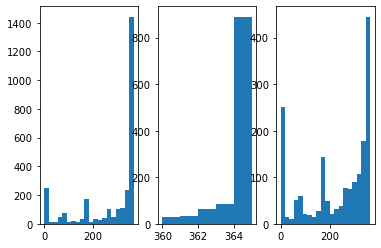

In [107]:
plt.subplot(1, 3, 1) 
plt.hist(data = belize_df, x = 'availability_365', bins = 20)


plt.subplot(1, 3, 2) 
plt.hist(data = plus360_df, x = 'availability_365', bins = 5)


plt.subplot(1, 3, 3) 
plt.hist(data = under360_df, x = 'availability_365', bins = 20)

##### Poisson distribution??? I had a really hard time determining this. The data appear to be multi-modal (peaks near 0, 100, 175, and 365). It is highly skewed towards values over 350. It is notable that you probably shouldn't consider this skew normal since that assumption would give incorrect values for probability (etc) for the peaks around 175 and near 0.

<AxesSubplot:>

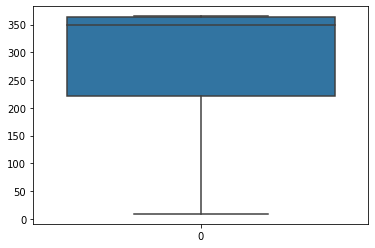

In [103]:
sns.boxplot(data=belize_df['availability_365'], showfliers=False)

###  6) What minimum night count are 75% of Airnbnb listing in Belize greater than?

<AxesSubplot:>

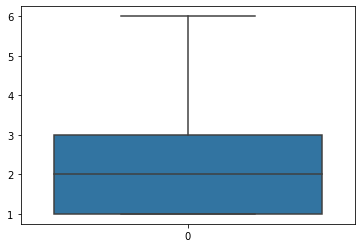

In [104]:
sns.boxplot(data=belize_df['minimum_nights'], showfliers=False)

In [105]:
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

###### By looking at our quartile ranges, it is apparent that 75% of rentals have a minimum night requirement of just 1 night

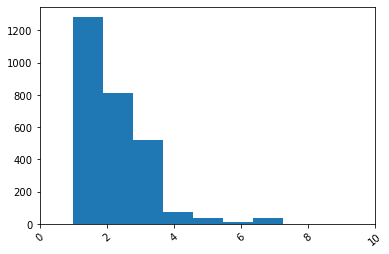

In [24]:
#This is just me looking at the distribution for minimum nights. I've limited the x-axis because the higher
#minimums are so rare.
plt.hist(x='minimum_nights', data=belize_df, bins=200)
plt.xticks(rotation = 40)
plt.xlim([0, 10])
plt.show()